The main goal in the EDA portion of my capstone is to explore relationships between different player stats, and their Fantasy Points (which is just a collection of all a players stats added up into one singlular number) scored. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import warnings
import seaborn as sns
import requests
from io import BytesIO
import nflfastpy as nfl

warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

In [29]:
#reading dataframe for player data from most recent season, 2020
df = pd.read_csv('yearly/2020.csv')



#creating my own categories for deeper analysis


df['TotalYds'] = df['RushingYds'] + df['ReceivingYds']
df['TotalTds'] = df['RushingTD'] + df['ReceivingTD']
df['Rush/YPG'] = df['RushingYds'] / df['G']
df['Rec/YPG'] = df['ReceivingYds'] / df['G']
df['YPG'] = df['TotalYds'] / df['G']
df['Rushing_Y/A'] = df['RushingYds'] / df['RushingAtt']
df['Y/Rec'] = df['ReceivingYds'] / df['Rec']
df['Y/Tgt'] = df['ReceivingYds'] / df['Tgt']
df['Tgt/G'] = df['Tgt'] / df['G']
df['PassingYds/G'] = df['PassingYds'] / df['G']
df['FantasyPPG'] = df['FantasyPoints'] / df['G']



df['Opportunities'] = df['RushingAtt'] + df['Tgt']
df['Touches'] = df['RushingAtt'] + df['Rec']


df['Opportunity/G'] = df['Opportunities'] / df['G']
df['Touches/G'] = df['Touches'] / df['G']
df['Y/Touch'] = df['TotalYds'] / df['Touches']
df['TD/Opportunity'] = df['TotalTds'] / df['Touches']

df['HalfPPRFantasyPoints'] = df['FantasyPoints'] + df['Rec']*0.5
df['HalfPPRFantasyPPG'] = df['HalfPPRFantasyPoints'] / df['G']

df['PPRFantasyPoints'] = df['FantasyPoints'] + df['Rec']
df['PPRFantasyPPG'] = df['PPRFantasyPoints'] / df['G']



df.head(10)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,TotalYds,TotalTds,Rush/YPG,Rec/YPG,YPG,Rushing_Y/A,Y/Rec,Y/Tgt,Tgt/G,PassingYds/G,FantasyPPG,Opportunities,Touches,Opportunity/G,Touches/G,Y/Touch,TD/Opportunity,HalfPPRFantasyPoints,HalfPPRFantasyPPG,PPRFantasyPoints,PPRFantasyPPG
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2,2141,17,126.687500,7.125000,133.812500,5.362434,6.000000,3.677419,1.937500,0.000000,19.625000,409,397,25.562500,24.812500,5.392947,0.042821,323.5,20.218750,333.0,20.812500
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0,1688,21,62.133333,50.400000,112.533333,4.983957,9.108434,7.065421,7.133333,0.000000,19.666667,294,270,19.600000,18.000000,6.251852,0.077778,336.5,22.433333,378.0,25.200000
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3,1918,17,111.214286,25.785714,137.000000,4.990385,8.204545,6.685185,3.857143,0.000000,21.000000,366,356,26.142857,25.428571,5.387640,0.047753,316.0,22.571429,338.0,24.142857
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1,1416,11,0.000000,94.400000,94.400000,NaN,13.485714,9.765517,9.666667,0.266667,13.866667,145,105,9.666667,7.000000,13.485714,0.104762,260.5,17.366667,313.0,20.866667
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1,1374,18,0.000000,98.142857,98.142857,NaN,11.947826,9.221477,10.642857,0.000000,17.357143,149,115,10.642857,8.214286,11.947826,0.156522,300.5,21.464286,358.0,25.571429
5,Tyreek Hill,KAN,WR,26,15,15,135,87,0,0,0,123,2,13,1276,15,242.0,0,1,0,1399,17,8.200000,85.066667,93.266667,9.461538,14.666667,9.451852,9.000000,0.000000,16.133333,148,100,9.866667,6.666667,13.990000,0.170000,285.5,19.033333,329.0,21.933333
6,Josh Allen,BUF,QB,24,16,16,1,1,4544,37,572,421,8,102,12,1,395.0,10,9,6,433,9,26.312500,0.750000,27.062500,4.127451,12.000000,12.000000,0.062500,284.000000,24.687500,103,103,6.437500,6.437500,4.203883,0.087379,395.5,24.718750,396.0,24.750000
7,Aaron Rodgers,GNB,QB,37,16,16,1,1,4299,48,526,149,3,38,-6,0,382.0,5,4,2,143,3,9.312500,-0.375000,8.937500,3.921053,-6.000000,-6.000000,0.062500,268.687500,23.875000,39,39,2.437500,2.437500,3.666667,0.076923,382.5,23.906250,383.0,23.937500
8,Kyler Murray,ARI,QB,23,16,16,0,0,3971,26,558,819,11,133,0,0,379.0,12,9,4,819,11,51.187500,0.000000,51.187500,6.157895,NaN,NaN,0.000000,248.187500,23.687500,133,133,8.312500,8.312500,6.157895,0.082707,379.0,23.687500,379.0,23.687500
9,Patrick Mahomes,KAN,QB,25,15,15,2,0,4740,38,588,308,2,62,0,0,374.0,6,5,2,308,2,20.533333,0.000000,20.533333,4.967742,NaN,0.000000,0.133333,316.000000,24.933333,64,62,4.266667,4.133333,4.967742,0.032258,374.0,24.933333,374.0,24.933333


In [3]:
#df.info()

In [4]:
#creating dataframes for each position
rb_df = df[df['Pos'] == 'RB']
wr_df = df[df['Pos'] == 'WR']
te_df = df[df['Pos'] == 'TE']
qb_df = df[df['Pos'] == 'QB']
flex_df = df[df['Pos'] != 'QB']

In [5]:
#Setting Minimum threshold per position, to filter out players with very low volume
rb_df = rb_df[rb_df['Opportunities'] > 10]
qb_df = df[df['PassingAtt'] > 20]
wr_df = wr_df[wr_df['Opportunities'] > 10]
te_df = te_df[te_df['Opportunities'] > 10]
flex_df = df[df['Opportunities'] > 10]

Text(0.5, 1.0, 'RB Half PPR PPG vs Opportunity/G')

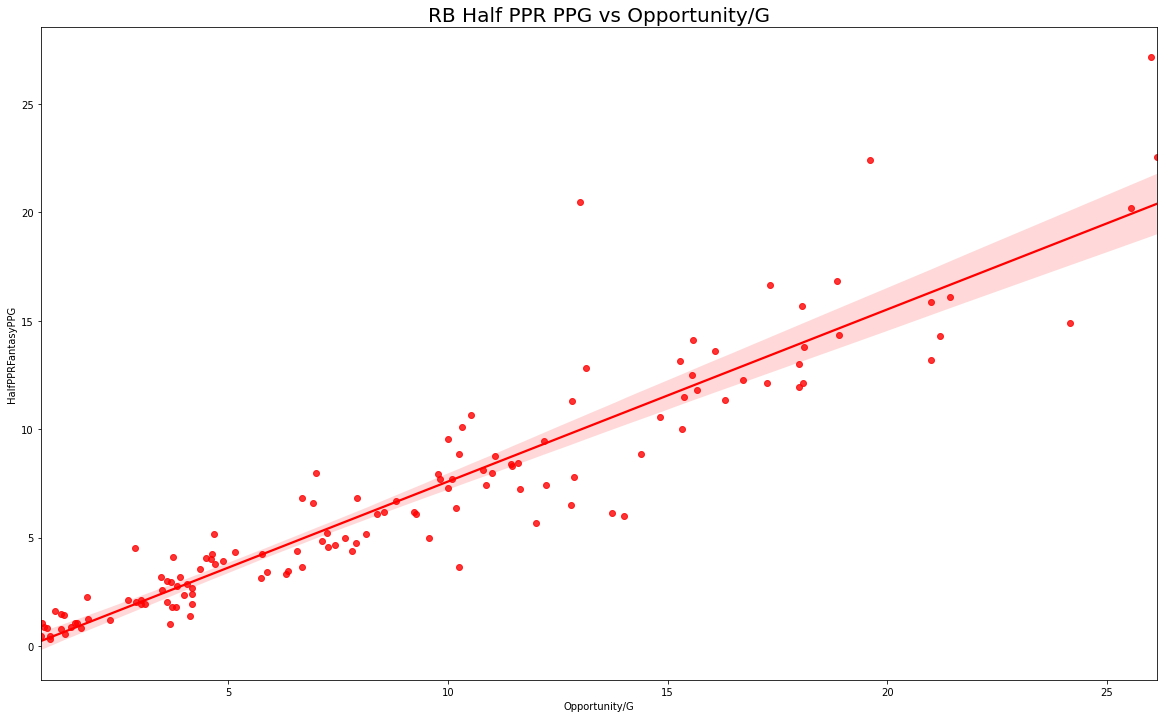

In [6]:
# Comparing oppurtunities per game to fantasy points per game
# The most common Fantasy football league uses Half PPR (Points per Reception), so we will use Half PPR Fantasy Points for all of our graphs
fig, ax = plt.subplots(figsize=(20,12))

sns.regplot(
    x=rb_df['Opportunity/G'], 
    y=rb_df['HalfPPRFantasyPPG'],
    color = 'Red',
    scatter=True).set_title('RB Half PPR PPG vs Opportunity/G', fontsize = 20)

Text(0.5, 1.0, 'RB Half PPR Fantasy Points vs Opportunity/G')

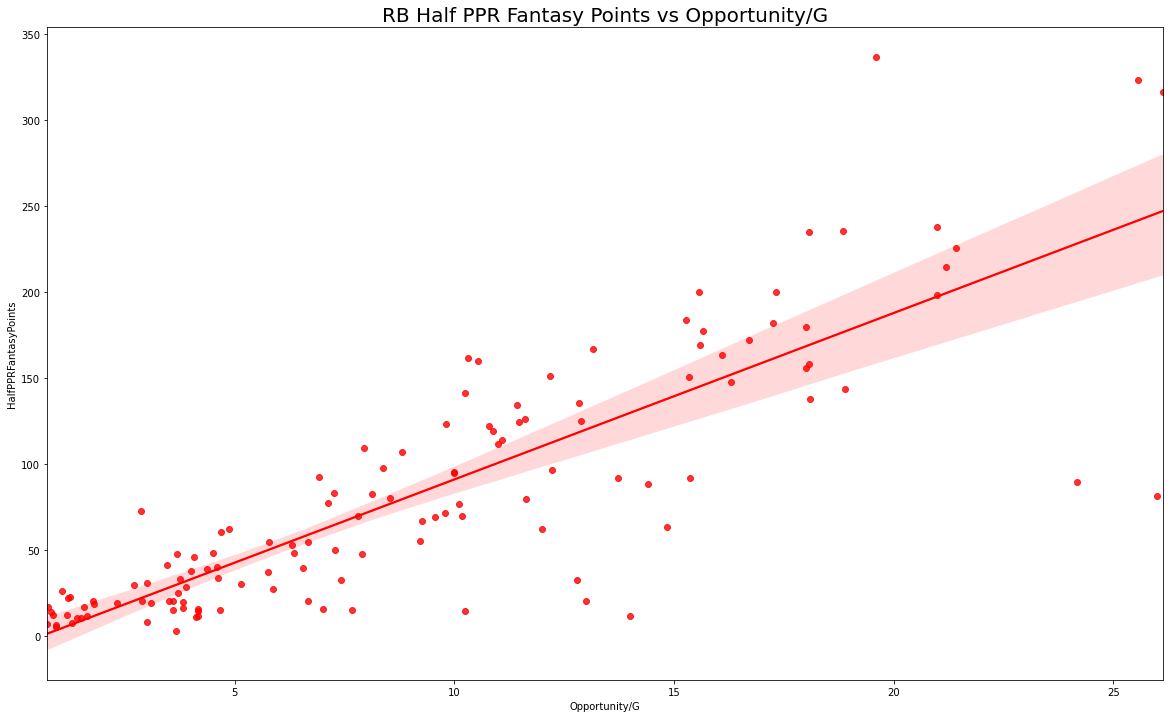

In [7]:
#Comparing Opportunities a game to total fantasy points
fig, ax = plt.subplots(figsize=(20,12))

sns.regplot(
    x=rb_df['Opportunity/G'], 
    y=rb_df['HalfPPRFantasyPoints'],
    color = 'Red',
    scatter=True).set_title('RB Half PPR Fantasy Points vs Opportunity/G', fontsize = 20)

Text(0.5, 1.0, 'RB Fantasy Points vs Total Opportunity')

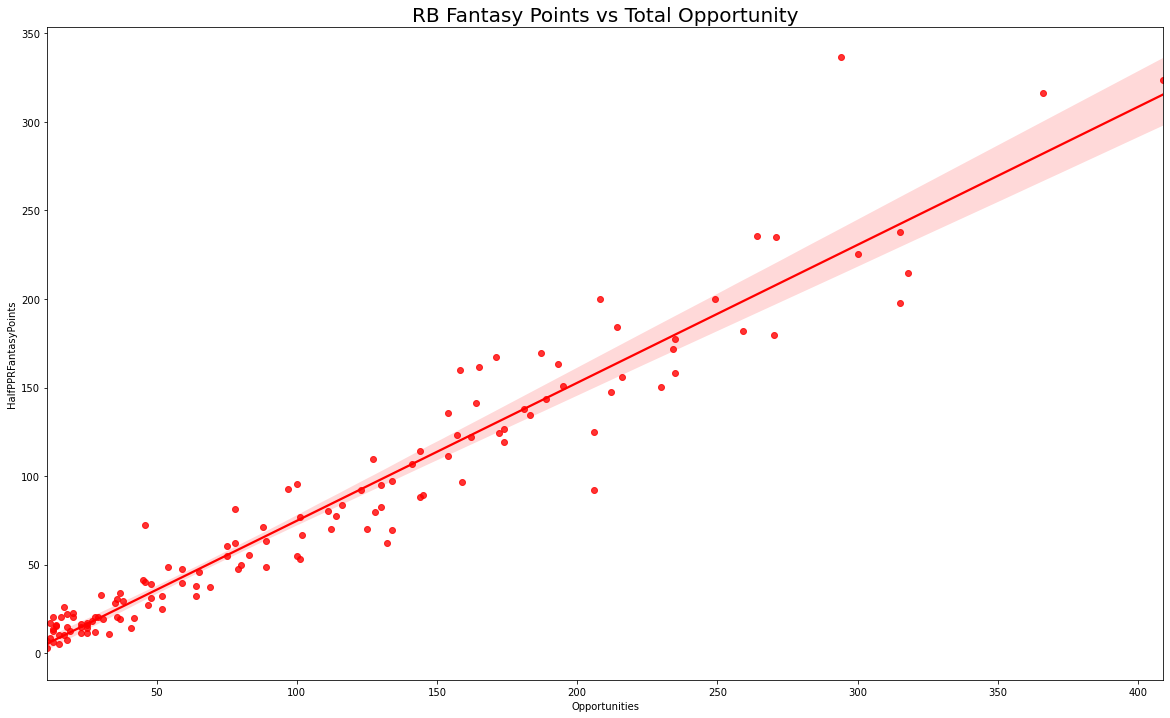

In [8]:
#Comparing Total Opportunity to Total Fantasy Points
fig, ax = plt.subplots(figsize=(20,12))

sns.regplot(
    x=rb_df['Opportunities'], 
    y=rb_df['HalfPPRFantasyPoints'],
    color = 'Red',
    scatter=True).set_title('RB Fantasy Points vs Total Opportunity', fontsize = 20)


As you can see, for at least running backs, the more opportunities you have, the higher your fantasy points will be. Strong correlation.

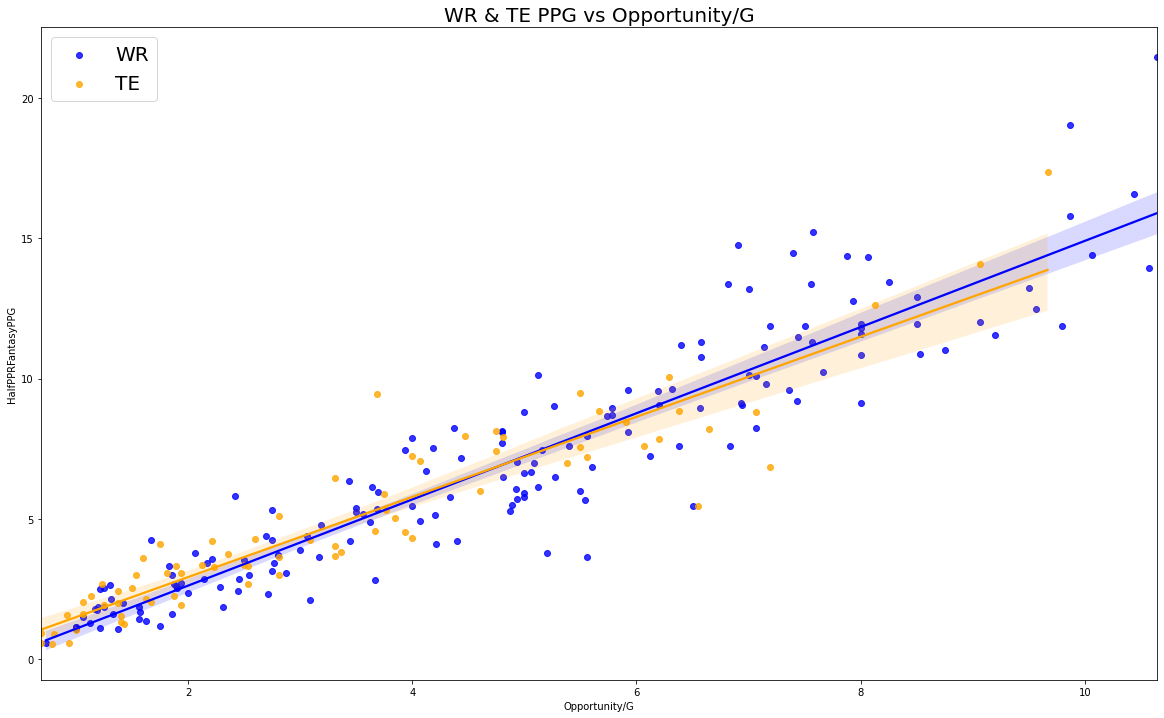

In [9]:
#Comparing the same thing for WRs and TEs insted of RBs to see if we see the same trends
#I am only looking at per game points, because it gives us better data than overall points, which take into account injuries
fig, ax = plt.subplots(figsize=(20, 12))


sns.regplot(
    x=wr_df['Opportunity/G'], 
    y=wr_df['HalfPPRFantasyPPG'], 
    label = 'WR',
    color = 'Blue',
    scatter=True)

sns.regplot(
    x=te_df['Opportunity/G'], 
    y=te_df['HalfPPRFantasyPPG'], 
    label = 'TE', 
    color = 'Orange',
    scatter=True).set_title('WR & TE PPG vs Opportunity/G', fontsize = 20)

ax.legend(fontsize = 20, loc = 'upper left')

#We see the same trends, strong correlation between opportunity and Fantasy Points, not surprising

In [10]:
#Comparing the same thing for All the flex postitions (WR, RB, TE) to see if we see the same trends
#fig, ax = plt.subplots(figsize=(10, 6))

#sns.regplot(
    #x=flex_df['Opportunity/G'], 
    #y=flex_df['HalfPPRFantasyPPG'],
    #scatter=True).set_title('Flex PPG vs Opportunity/G', fontsize = 20)
    
#Possibly redundant if I plotted all values seperately and see same trend for all 3

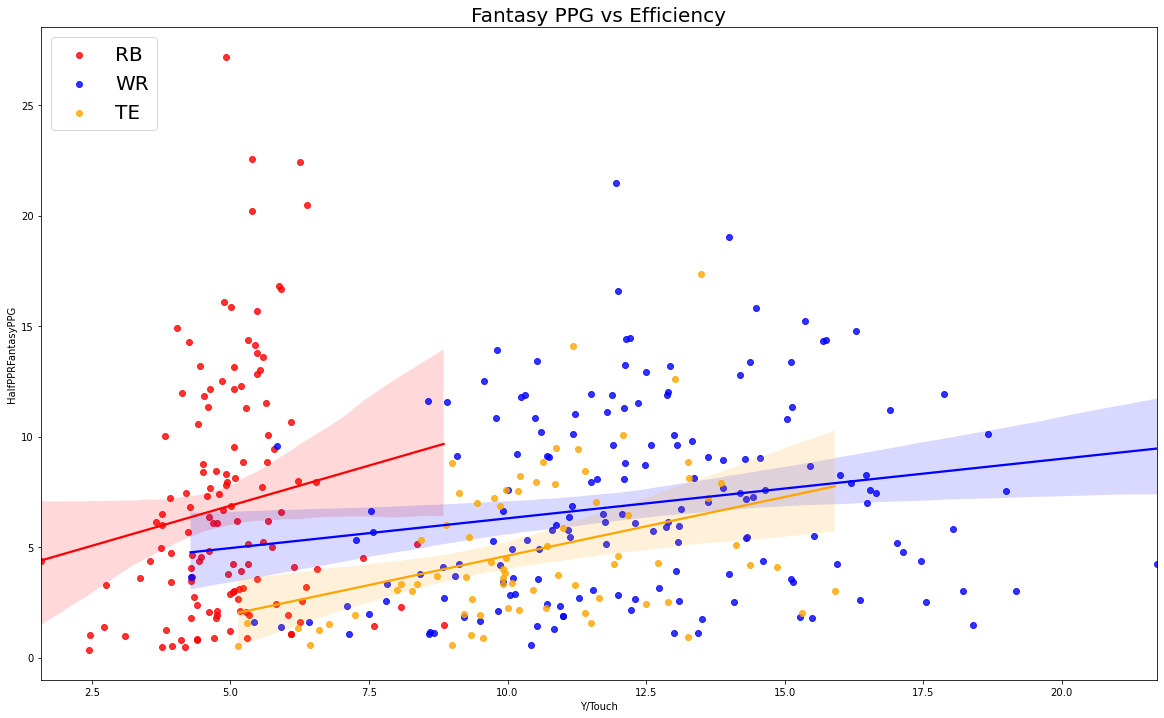

In [11]:
#Now I compare Efficiency to points per game. 
#Efficiency I have defined as how many Yards a player created for themselves per Touch
fig, ax = plt.subplots(figsize=(20, 12))


sns.regplot(
    x=rb_df['Y/Touch'], 
    y=rb_df['HalfPPRFantasyPPG'],
    color = 'Red',
    label = 'RB',
    scatter=True)

sns.regplot(
    x=wr_df['Y/Touch'], 
    y=wr_df['HalfPPRFantasyPPG'], 
    color = 'Blue', 
    label = 'WR',
    scatter=True)


sns.regplot(
    x=te_df['Y/Touch'], 
    y=te_df['HalfPPRFantasyPPG'], 
    color = 'Orange',
    label = 'TE',
    scatter=True).set_title('Fantasy PPG vs Efficiency', fontsize = 20)

ax.legend(fontsize = 20, loc = 'upper left')

 
#Opportunity appears to be per game much higher correlated to Fantasy Points than efficiency
#A player with more opportunity will outscore a player with more perceived "talent"

#Another Take away is RBs have a much lower Yards/Touch, with WRs have a far Higher YpT ceiling

In [12]:
#compare the same trends for WR
#fig, ax = plt.subplots(figsize=(10, 6))

#sns.regplot(
#    x=wr_df['Y/Touch'], 
#    y=wr_df['HalfPPRFantasyPPG'], 
#    color = 'Blue', 
#    label = 'WR',
#    scatter=True)


#sns.regplot(
#    x=te_df['Y/Touch'], 
#    y=te_df['HalfPPRFantasyPPG'], 
#    color = 'Orange',
#    label = 'TE',
#    scatter=True).set_title('WR, TE Fantasy PPG vs Efficiency', fontsize = 20)

#Added All of this to same graph above ^^

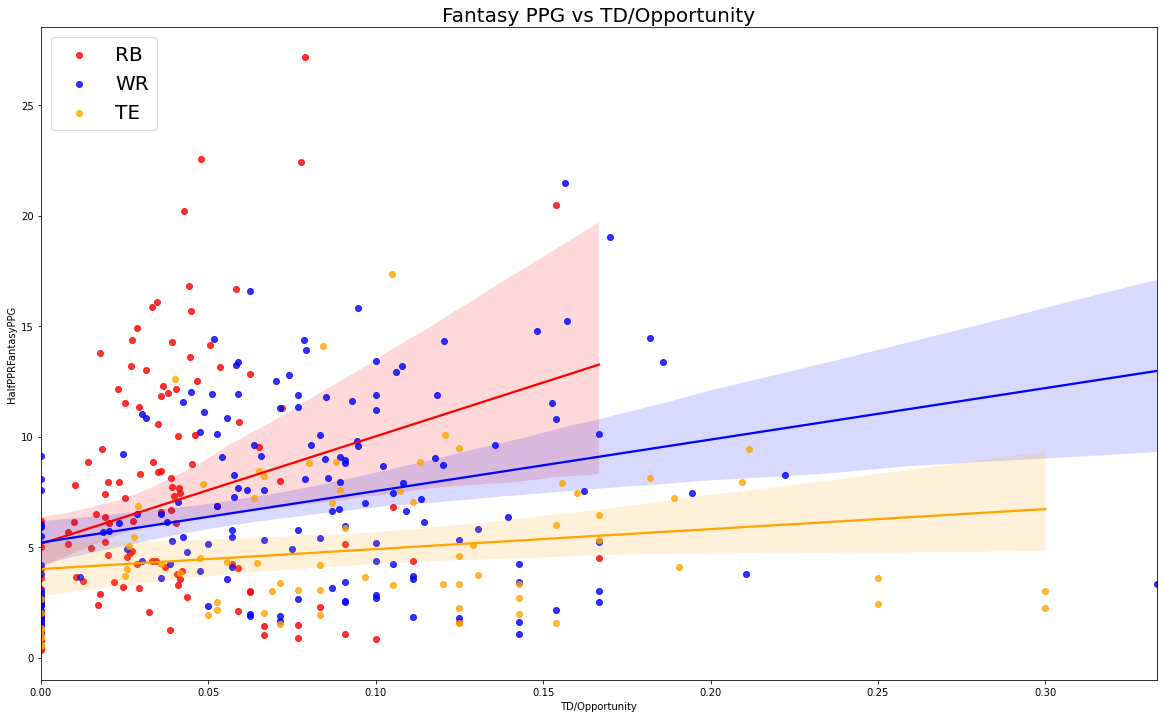

In [13]:
#Comparing rb TD/opportunity to Fantasy points
fig, ax = plt.subplots(figsize=(20, 12))

sns.regplot(
    x=rb_df['TD/Opportunity'], 
    y=rb_df['HalfPPRFantasyPPG'],
    color = 'Red',
    label = 'RB',
    scatter=True)

sns.regplot(
    x=wr_df['TD/Opportunity'], 
    y=wr_df['HalfPPRFantasyPPG'],
    color = 'Blue',
    label = 'WR',
    scatter=True)

sns.regplot(
    x=te_df['TD/Opportunity'], 
    y=te_df['HalfPPRFantasyPPG'],
    color = 'Orange',
    label = 'TE',
    scatter=True).set_title('Fantasy PPG vs TD/Opportunity', fontsize = 20)

ax.legend(fontsize = 20, loc = 'upper left')
# Weird Distribution, I would guess it is because many runnings backs are only used to score TDs in short yardage situations
#TD opportunity Seems to matter more for RBs

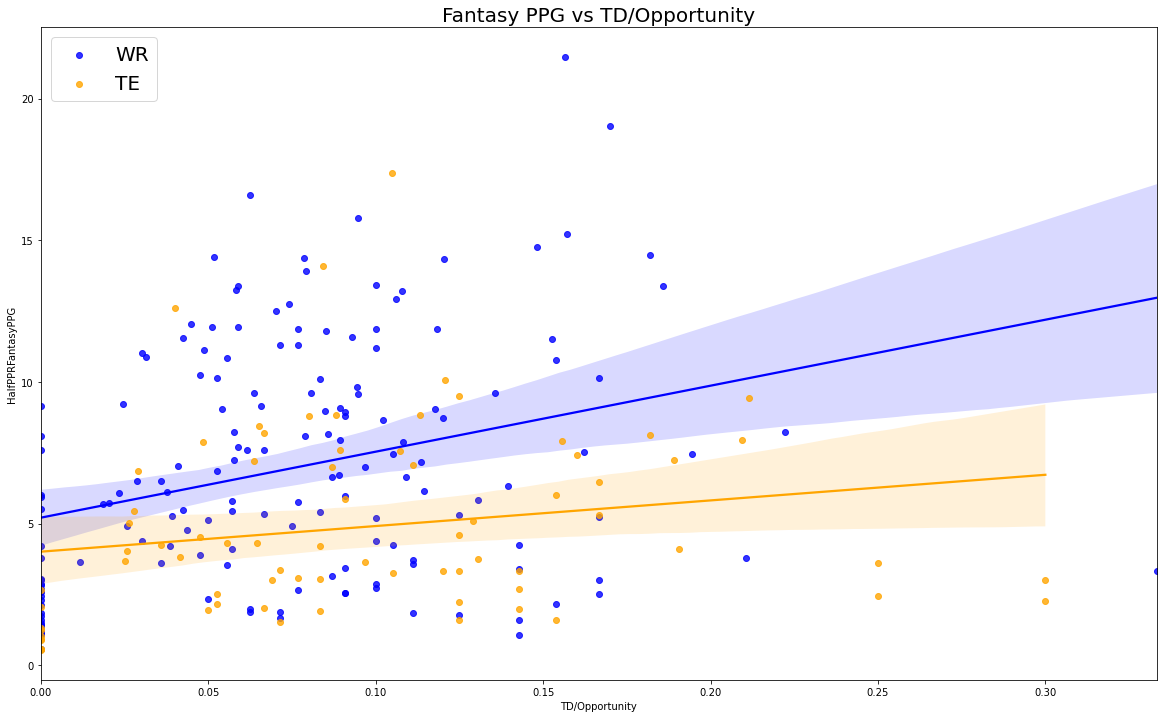

In [14]:
#Comparing WR TD/opportunity to Fantasy points


# >>   Same as above graph but only for WR, TE, Looks better than 3 lines plotted on same graph <<

fig, ax = plt.subplots(figsize=(20,12))

sns.regplot(
    x=wr_df['TD/Opportunity'], 
    y=wr_df['HalfPPRFantasyPPG'],
    color = 'Blue',
    label = 'WR',
    scatter=True)

sns.regplot(
    x=te_df['TD/Opportunity'], 
    y=te_df['HalfPPRFantasyPPG'], 
    color = 'Orange',
    label = 'TE',
    scatter=True).set_title('Fantasy PPG vs TD/Opportunity', fontsize = 20)

ax.legend(fontsize = 20, loc = 'upper left')


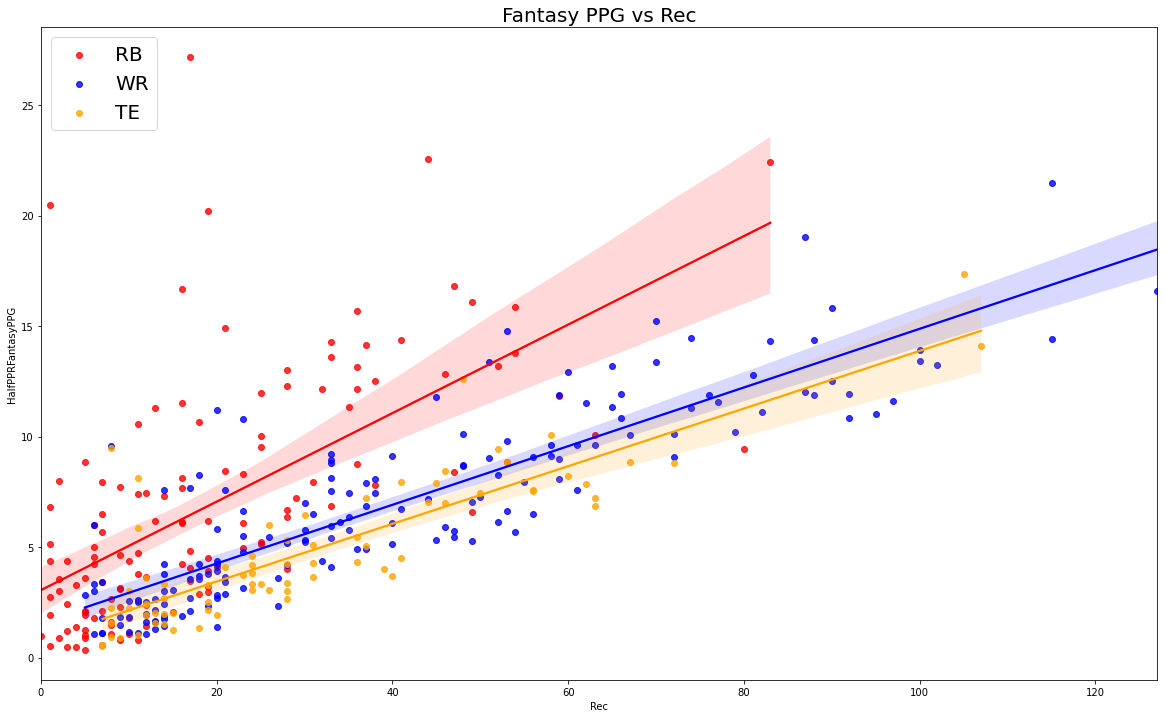

In [15]:
#Comparing Rec to Fantasy points
fig, ax = plt.subplots(figsize=(20, 12))

sns.regplot(
    x=rb_df['Rec'], 
    y=rb_df['HalfPPRFantasyPPG'],
    color = 'Red',
    label = 'RB',
    scatter=True)

sns.regplot(
    x=wr_df['Rec'], 
    y=wr_df['HalfPPRFantasyPPG'],
    color = 'Blue',
    label = 'WR',
    scatter=True)

sns.regplot(
    x=te_df['Rec'], 
    y=te_df['HalfPPRFantasyPPG'],
    color = 'Orange',
    label = 'TE',
    scatter=True).set_title('Fantasy PPG vs Rec', fontsize = 20)

ax.legend(fontsize = 20, loc = 'upper left')

#Receptions seem to matter more for RB than for TE or WR

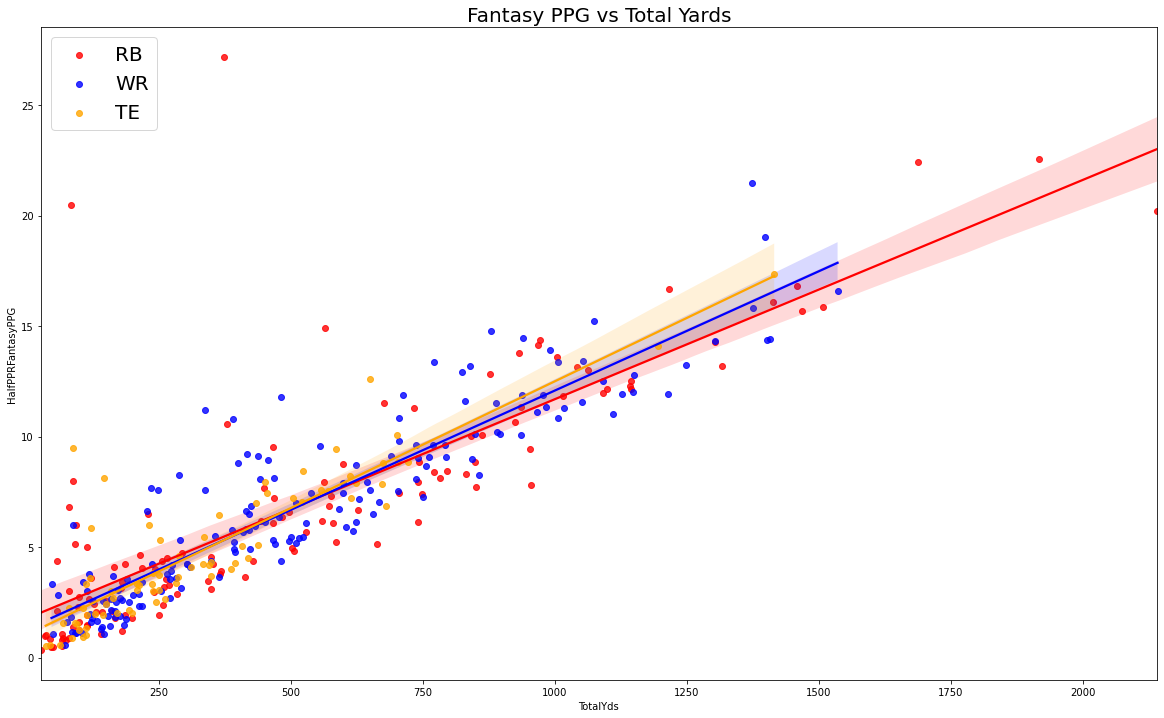

In [16]:
#Comparing Total Yards to Fantasy points
fig, ax = plt.subplots(figsize=(20, 12))

sns.regplot(
    x=rb_df['TotalYds'], 
    y=rb_df['HalfPPRFantasyPPG'],
    color = 'Red',
    label = 'RB',
    scatter=True)

sns.regplot(
    x=wr_df['TotalYds'], 
    y=wr_df['HalfPPRFantasyPPG'],
    color = 'Blue',
    label = 'WR',
    scatter=True)

sns.regplot(
    x=te_df['TotalYds'], 
    y=te_df['HalfPPRFantasyPPG'],
    color = 'Orange',
    label = 'TE',
    scatter=True).set_title('Fantasy PPG vs Total Yards', fontsize = 20)

ax.legend(fontsize = 20, loc = 'upper left')

#Pretty even for all Positions that Yards Translates to Fantasy Points

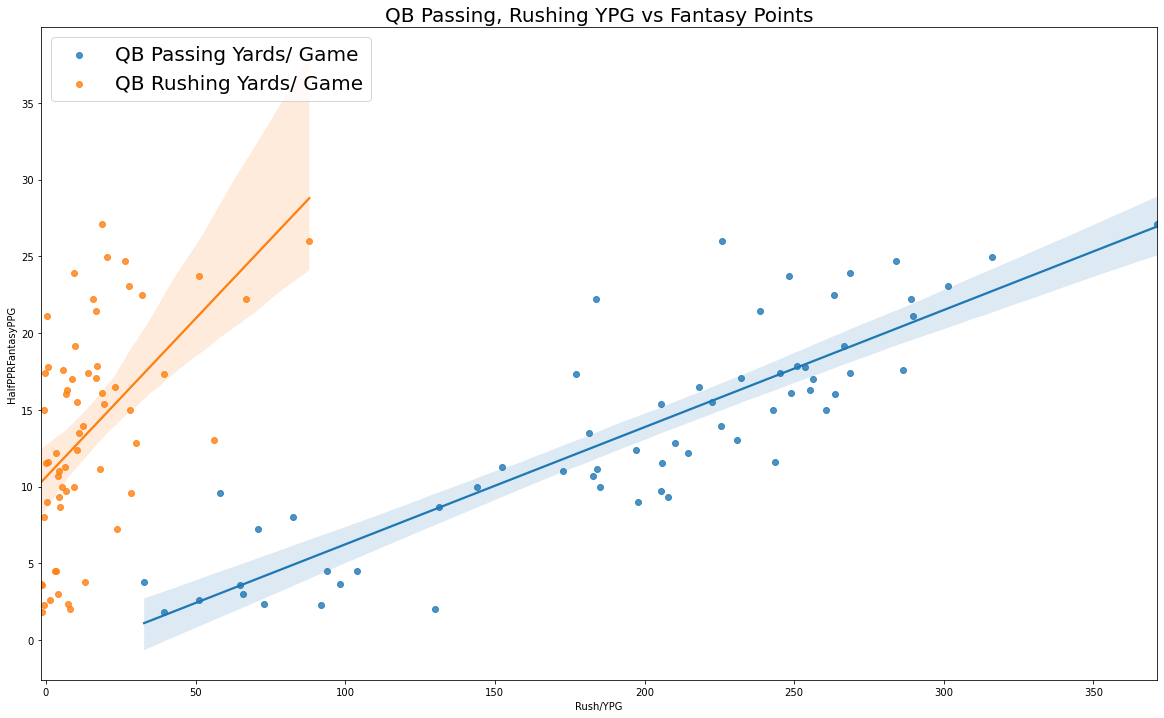

In [17]:
#Comparing Passing Yards per Game and Rushing Yards per game for a QB vs Fantasy Points
fig, ax = plt.subplots(figsize=(20, 12))


sns.regplot(
    x=qb_df['PassingYds/G'], 
    y=qb_df['HalfPPRFantasyPPG'], 
    label = 'QB Passing Yards/ Game',
    scatter=True)

sns.regplot(
    x=qb_df['Rush/YPG'], 
    y=qb_df['HalfPPRFantasyPPG'], 
    label = 'QB Rushing Yards/ Game',
    scatter=True).set_title('QB Passing, Rushing YPG vs Fantasy Points', fontsize = 20)

ax.legend(fontsize = 20, loc = 'upper left')

Text(0.5, 0, 'All Players Rushing Yards')

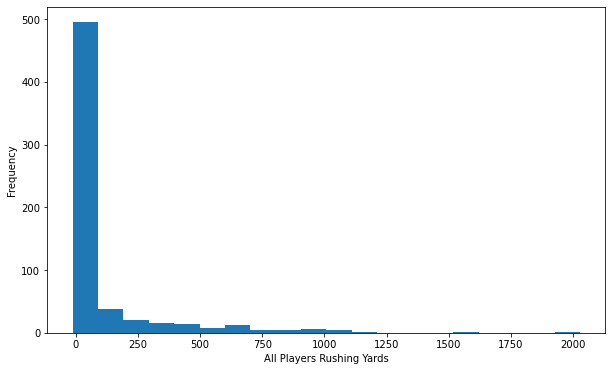

In [18]:
#Plotting Distribution of all players rushing Yards
ax = df.RushingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax.set_xlabel('All Players Rushing Yards')

Text(0.5, 0, 'RB Rushing Yards')

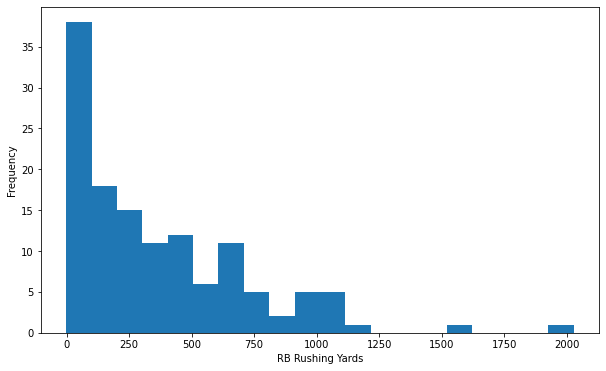

In [19]:
#Plotting Distribution of RBs rushing Yards
ax = rb_df.RushingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax.set_xlabel('RB Rushing Yards')

#Strong Outliers

Text(0.5, 0, 'Flex Receiving Yards')

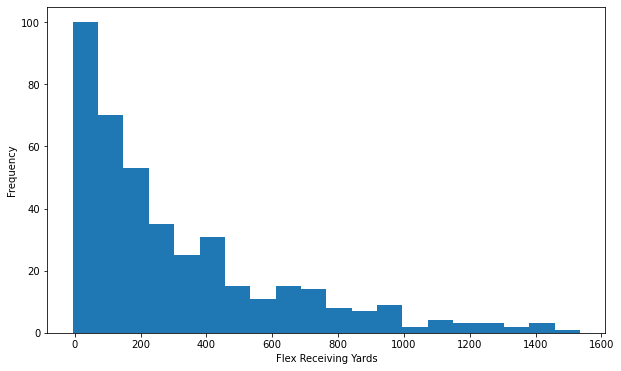

In [20]:
ax2 = flex_df.ReceivingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax2.set_xlabel('Flex Receiving Yards')


Text(0.5, 0, 'WR Receiving Yards')

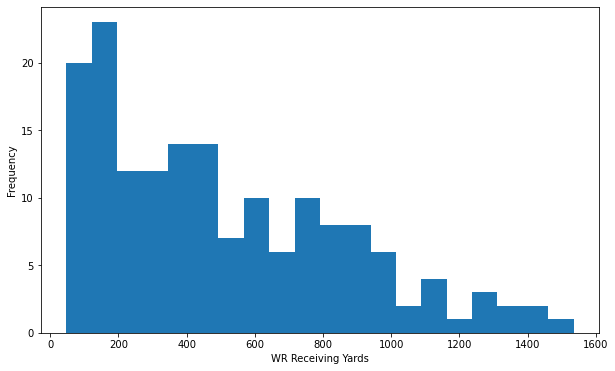

In [21]:
#Distribution of WR Receiving Yards
ax2 = wr_df.ReceivingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax2.set_xlabel('WR Receiving Yards')

#Much more evenly distributed than RB rushing Yards, less top heavy

Text(0.5, 0, 'TE Receiving Yards')

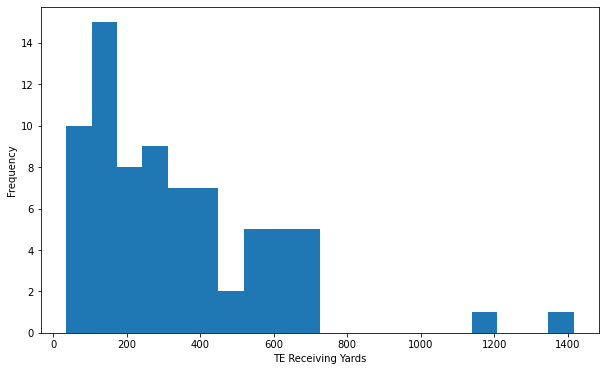

In [22]:
#Distribution of TE receiving Yards

ax2 = te_df.ReceivingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax2.set_xlabel('TE Receiving Yards')

# TWO Noticeable strong outliers, similar to RB

Text(0.5, 0, 'Passing Yards')

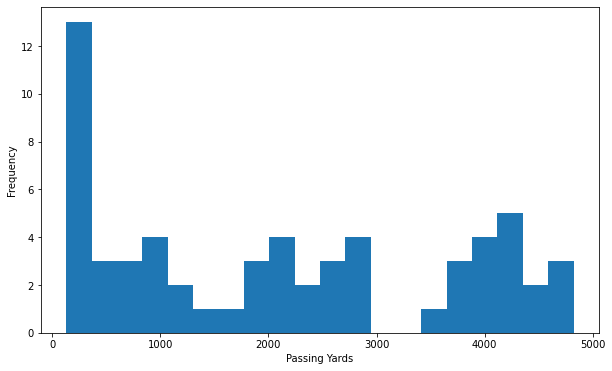

In [23]:
#QBpassing = df[df['PassingAtt'] > 50]
#ax3 = QBpassing.PassingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))

#Only plotting QBs with a minimum number of pass attempts

ax3 = qb_df.PassingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax3.set_xlabel('Passing Yards')

Text(0.5, 0, 'RB Rushing TDs')

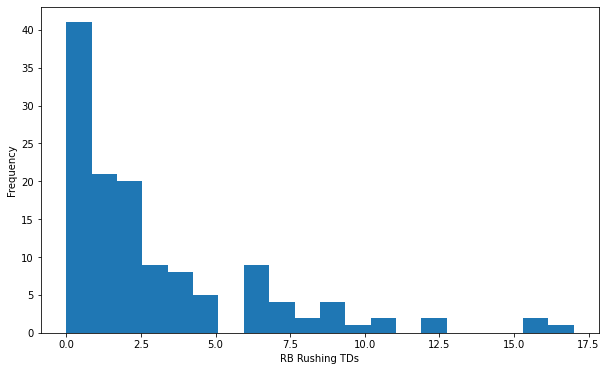

In [24]:
#Plotting RB rushing TDs
ax4 = rb_df.RushingTD.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax4.set_xlabel('RB Rushing TDs')

Text(0.5, 0, 'WR Receiving TDs')

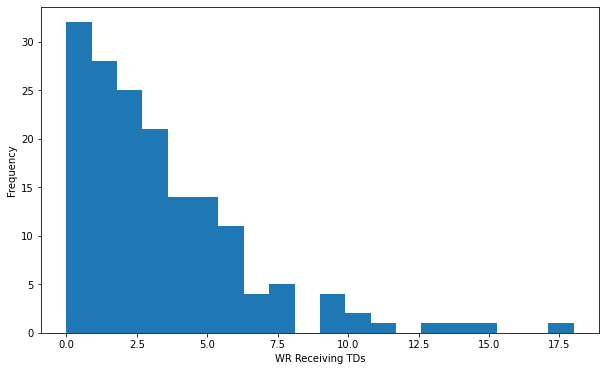

In [25]:
#Plotting WR receiving TDs
ax5 = wr_df.ReceivingTD.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax5.set_xlabel('WR Receiving TDs')
#Again more evenly distributed than RB Rushing TDs

Text(0.5, 0, 'Flex Receiving TDs')

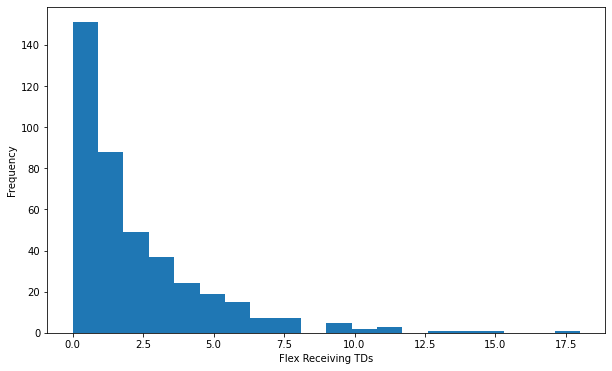

In [26]:
ax6 = flex_df.ReceivingTD.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax6.set_xlabel('Flex Receiving TDs')

#Receiving TDs of all Flex positions

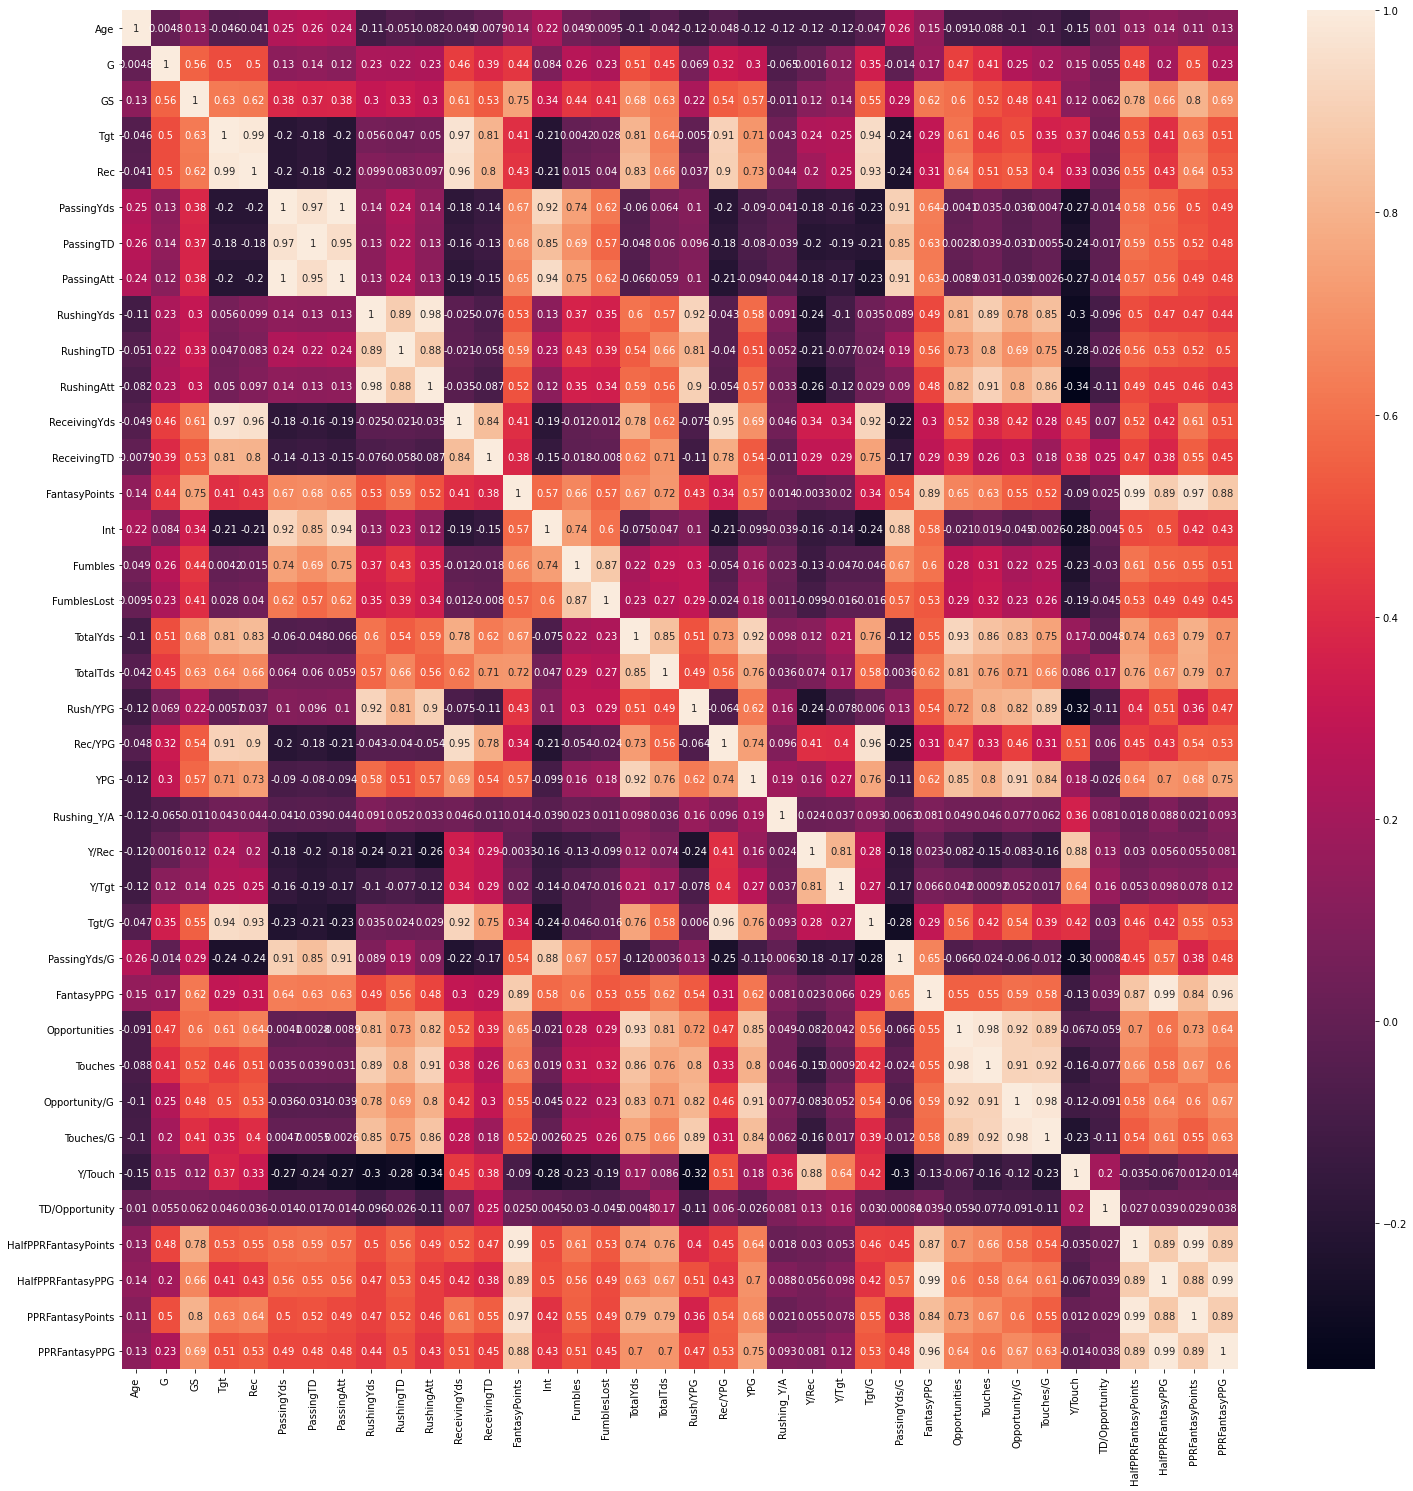

In [30]:
fig, ax = plt.subplots(figsize=(25,25)) 

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#Correlation Matrix

Lots to take away from the correlation Matrix. Focusing Primarily on HalfPPRFantasyPoints, interesting to see Opportunity and Touches have a very high correlation, while Efficiency or Y/Touch has a very very low correlation. Also something to note: when receptions are counted toward fantasy score (Half PPR and PPR fantasy Points), almost all variables have a higher correlation, except for the variables related to TDs.